In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima #SARIMAX using pmdarima

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

#Import libraries for multicollineaarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import libraries for transformations
import joblib



In [2]:
import sys
sys.path.append(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try')
import SARIMAX

SARIMAX for Visayas
DATA PREPROCESSING

In [2]:
#Import the necessary files
labels_csv = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas\train_labels_transformed.csv'
data_csv = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas\train_data_transformed.csv'
test_data_csv=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/test_data.csv'
test_labels_csv=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/test_labels.csv'
transformed_data=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/data_transformed.csv'
transformed_test=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/test_data_transformed.csv'
complete_data = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/VIS_Daily_Complete.csv'

transformed_train_data = pd.read_csv(data_csv)
transformed_train_labels = pd.read_csv(labels_csv)
transformed_data = pd.read_csv(transformed_data)
transformed_test_data = pd.read_csv(transformed_test)

test_data = pd.read_csv(test_data_csv)
test_labels = pd.read_csv(test_labels_csv)

complete_data_df = pd.read_csv(complete_data)
gwap = complete_data_df[['GWAP']]
lwap = complete_data_df[['LWAP']]

#80% train set, 20% test
train_size = int(len(transformed_train_labels))  
test_size = int(len(test_data))

date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

train_date = date_df[:train_size]
test_date = date_df[train_size:]

#Resetting the Index
train_date = train_date.reset_index(drop=True)
test_date = test_date.reset_index(drop=True)

In [3]:
#Prepare the dataframes
#Rename columns of complete transformed test dataframe
transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
labels_columns = ['GWAP', 'LWAP']
labels_train = pd.DataFrame(transformed_train_labels, columns = labels_columns)
labels_test = pd.DataFrame(test_labels, columns = labels_columns)

#Rename columns of complete transformed dataframe
transformed_data.rename(columns={'0':'FLOW_VIS', '1':'TMIN_Catbalogan', '2':'TMAX_Roxas City','3':'TMIN_Roxas City','4':'TMAX_Catarman','5':'TMIN_Catarman','6':'TMAX_Maasin','7':'TMIN_Maasin','8':'TMAX_Dumaguete', '9':'TMIN_Dumaguete', '10':'GWAP','11':'LWAP','12':'Hourly Demand','13':'TMAX_Catbalogan','14':'RESERVE_GWAP_Fr','15':'RESERVE_GWAP_Ru','16':'RESERVE_GWAP_Rd','17':'RESERVE_GWAP_Dr','18':'RAINFALL_Catbalogan','19':'RAINFALL_Roxas City','20':'RAINFALL_Catarman','21':'RAINFALL_Maasin','22':'RAINFALL_Dumaguete'}, inplace=True)

#Define transformed dataset for test set GWAP and LWAP
transformed_test_data.rename(columns={'0':'FLOW_VIS', '1':'TMIN_Catbalogan', '2':'TMAX_Roxas City','3':'TMIN_Roxas City','4':'TMAX_Catarman','5':'TMIN_Catarman','6':'TMAX_Maasin','7':'TMIN_Maasin','8':'TMAX_Dumaguete', '9':'TMIN_Dumaguete', '10':'GWAP','11':'LWAP','12':'Hourly Demand','13':'TMAX_Catbalogan','14':'RESERVE_GWAP_Fr','15':'RESERVE_GWAP_Ru','16':'RESERVE_GWAP_Rd','17':'RESERVE_GWAP_Dr','18':'RAINFALL_Catbalogan','19':'RAINFALL_Roxas City','20':'RAINFALL_Catarman','21':'RAINFALL_Maasin','22':'RAINFALL_Dumaguete'}, inplace=True)
transformed_labels_test = pd.DataFrame(transformed_test_data, columns = labels_columns)

#Lag the transformed data
transformed_data = transformed_data.shift(1)
transformed_data = transformed_data.fillna(0)

#Remove GWAP and LWAP from exogenous set
transformed_exog = transformed_data.drop(columns=['GWAP','LWAP'])

Multicollinearity Test


In [4]:
%run SARIMAX.py
transformed_exog = remove_multicollinear(transformed_exog, 10)
calculate_vif(transformed_exog)

Dropping RAINFALL_Dumaguete with VIF of 65.35691495703318
Dropping TMIN_Catbalogan with VIF of 55.61361574722781
Dropping TMAX_Catarman with VIF of 45.54042836161959
Dropping TMAX_Maasin with VIF of 40.130770481608415
Dropping TMAX_Roxas City with VIF of 33.049939815321544
Dropping TMAX_Dumaguete with VIF of 27.097842023474545
Dropping TMIN_Maasin with VIF of 23.924557536208734
Dropping Hourly Demand with VIF of 20.105976038483348
Dropping TMIN_Catarman with VIF of 17.557361479504674
Dropping TMIN_Roxas City with VIF of 14.51518034827686
Final VIF values:
                 feature       VIF
0              FLOW_VIS  6.472034
1        TMIN_Dumaguete  8.461147
2       TMAX_Catbalogan  6.521893
3       RESERVE_GWAP_Fr  5.556049
4       RESERVE_GWAP_Ru  4.707388
5       RESERVE_GWAP_Rd  2.509630
6       RESERVE_GWAP_Dr  6.050694
7   RAINFALL_Catbalogan  6.949692
8   RAINFALL_Roxas City  5.830259
9     RAINFALL_Catarman  8.737513
10      RAINFALL_Maasin  5.805614


,feature,VIF
0,FLOW_VIS,6.472034
1,TMIN_Dumaguete,8.461147
2,TMAX_Catbalogan,6.521893
3,RESERVE_GWAP_Fr,5.556049
4,RESERVE_GWAP_Ru,4.707388
5,RESERVE_GWAP_Rd,2.509630
6,RESERVE_GWAP_Dr,6.050694
7,RAINFALL_Catbalogan,6.949692
8,RAINFALL_Roxas City,5.830259
9,RAINFALL_Catarman,8.737513


Prepare GWAP, LWAP, and exog variables

In [5]:
#Preparing transformed GWAP datasets
GWAP_train = labels_train['GWAP']
GWAP_train = pd.concat([train_date,GWAP_train], axis=1)
GWAP_train.set_index('Date', inplace=True)
GWAP_train.index = pd.to_datetime(GWAP_train.index)
GWAP_train.index.freq='D'
GWAP_train = GWAP_train.squeeze()


GWAP_test = transformed_labels_test['GWAP']
GWAP_test = pd.concat([test_date,GWAP_test], axis=1)
GWAP_test.set_index('Date', inplace=True)
GWAP_test.index = pd.to_datetime(GWAP_test.index)
GWAP_test = GWAP_test.squeeze()

#Preparing original GWAP datasets
GWAP = pd.concat([date_df,gwap], axis=1)
GWAP.set_index('Date', inplace=True)
GWAP.index = pd.to_datetime(GWAP.index)
GWAP.index.freq='D'
GWAP = GWAP.squeeze()

GWAP_test_inversed = GWAP[train_size:]

#Preparing the transformed LWAP datasets
LWAP_train = labels_train['LWAP']
LWAP_train = pd.concat([train_date,LWAP_train], axis=1)
LWAP_train.set_index('Date', inplace=True)
LWAP_train.index = pd.to_datetime(LWAP_train.index)
LWAP_train.index.freq='D'
LWAP_train = LWAP_train.squeeze()

LWAP_test = transformed_labels_test['LWAP']
LWAP_test = pd.concat([test_date,LWAP_test], axis=1)
LWAP_test.set_index('Date', inplace=True)
LWAP_test.index = pd.to_datetime(LWAP_test.index)
LWAP_test = LWAP_test.squeeze()

#Preparing the original LWAP datasets

LWAP = pd.concat([date_df,lwap], axis=1)
LWAP.set_index('Date', inplace=True)
LWAP.index = pd.to_datetime(LWAP.index)
LWAP.index.freq='D'
LWAP = LWAP.squeeze()

LWAP_test_inversed = LWAP[train_size:]

#Preparing the exog datasets
train_exog = transformed_exog[:train_size]
test_exog = transformed_exog[train_size:]

#Preparing the exogenous datasets
exog_train = pd.concat([train_date,train_exog], axis=1)
exog_train.set_index('Date', inplace=True)

test_exog = pd.DataFrame(test_exog)
test_exog = test_exog.reset_index()
exog_test = pd.concat([test_date,test_exog], axis=1)
exog_test.set_index('Date', inplace=True)
exog_test = exog_test.drop(columns=['index'])

In [9]:
#Applying the inverse transformations
#Loading inverse transformations for Visayas

minmax_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/minmax_scaler.pkl')
boxcox_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/boxcox_pipeline.pkl')
yeojohnson_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/yeojohnson_pipeline.pkl')
boxcoxy_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/boxcox_pipeliney.pkl')

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning:

Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning:

Trying to unpickle estimator PowerTransformer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Jojie\AppData\Local\Packages\PythonSo

In [10]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Visayas GWAP")
lwap_plot.update_layout(title=f"Visayas LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

Differencing

In [11]:
%run SARIMAX.py

#Checking for stationarity in GWAP data
perform_differencing(GWAP_train)
perform_differencing(LWAP_train)

#Perform differencing on train exogenous data
diff_exog_train = perform_df_differencing(exog_train)
diff_exog_train = diff_exog_train.fillna(0)

#Perform differencing on test exogenous data
diff_exog_test = perform_df_differencing(exog_test)
diff_exog_test = diff_exog_test.fillna(0)


Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_VIS' is stationary after differencing 0 times.
Column 'TMIN_Dumaguete' is stationary after differencing 0 times.
Column 'TMAX_Catbalogan' is stationary after differencing 0 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual 

Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 0 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual 

Column 'RAINFALL_Maasin' is stationary after differencing 0 times.
Column 'FLOW_VIS' is stationary after differencing 1 times.
Column 'TMIN_Dumaguete' is stationary after differencing 2 times.
Column 'TMAX_Catbalogan' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 0 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 1 times.
Column 'RAINFALL_Maasin' is stationary after differencing 1 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Final Codes\Day-Ahead\Try\SARIMAX.py:81: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual 

Order Specification

The ACF for GWAP is seen below
The PACF for GWAP is seen below


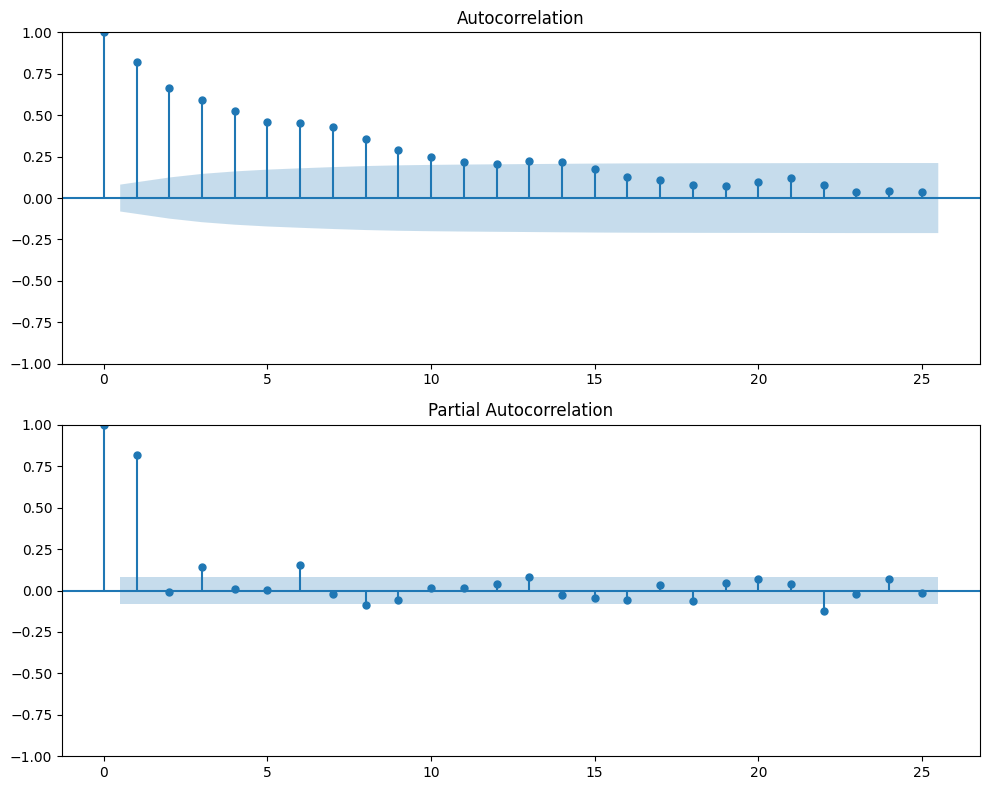

The ACF for LWAP is seen below
The PACF for LWAP is seen below


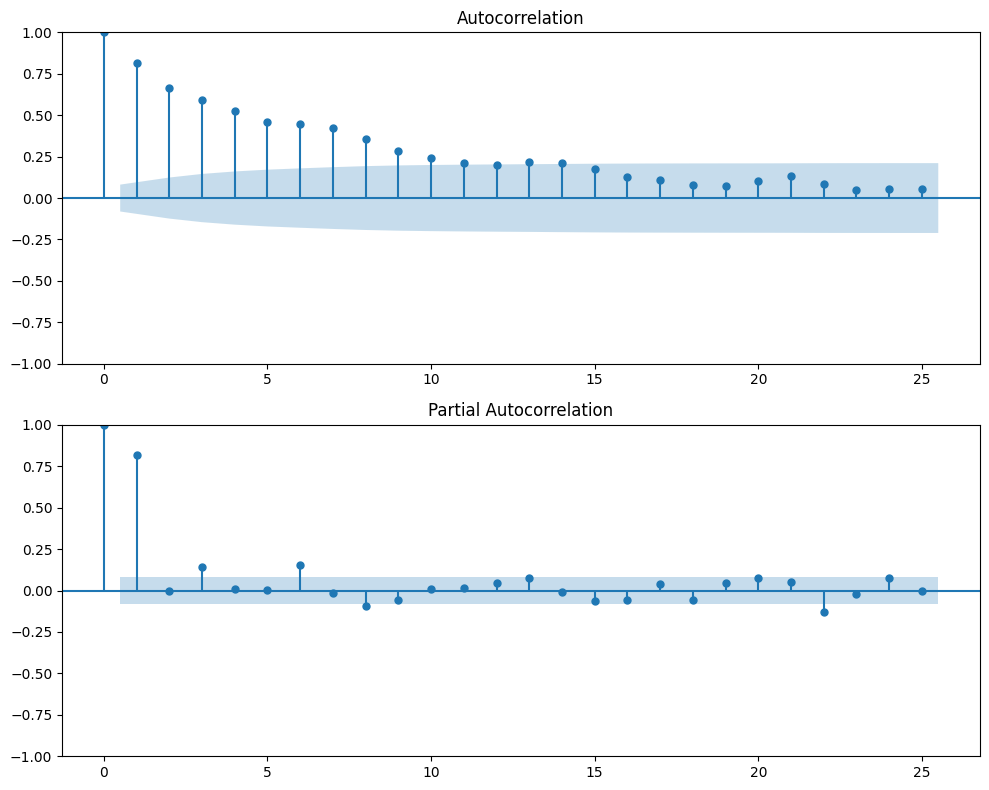

In [23]:
%run SARIMAX.py
# Get potential orders for GWAP
#Potential Orders for the AR terms is suggested by PACF
plot_orders(GWAP_train, lags=25, alpha=0.05, var='GWAP')
plot_orders(LWAP_train, lags=25, alpha=0.05, var='LWAP')

GWAP and LWAP Forecasting

In [12]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
GWAP_sarimax = seasonal_auto_arima(GWAP_train, max_p=1, max_d=2, max_q=10, exog_data=diff_exog_train )

#Display results of previous function
GWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 14 and an AIC of -1318.9123847629455


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(2, 0, 0, 14), suppress_warnings=True)

In [13]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
LWAP_sarimax = seasonal_auto_arima(LWAP_train, max_p=1, max_d=2, max_q=10, exog_data=diff_exog_train )

#Display results of previous function
LWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 14 and an AIC of -1222.0867039329976


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(2, 0, 0, 14), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -1.145216
         Iterations: 8
         Function evaluations: 1136
                                     SARIMAX Results                                     
Dep. Variable:                              GWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 6)   Log Likelihood                 668.806
Date:                           Thu, 27 Feb 2025   AIC                          -1307.612
Time:                                   10:00:57   BIC                          -1242.089
Sample:                               01-01-2022   HQIC                         -1282.073
                                    - 08-07-2023                                         
Covariance Type:                             opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -1.068990
         Iterations: 9
         Function evaluations: 1273
                                     SARIMAX Results                                      
Dep. Variable:                               LWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 7)   Log Likelihood                 624.290
Date:                            Thu, 27 Feb 2025   AIC                          -1218.580
Time:                                    10:01:24   BIC                          -1153.057
Sample:                                01-01-2022   HQIC                         -1193.041
                                     - 08-07-2023                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

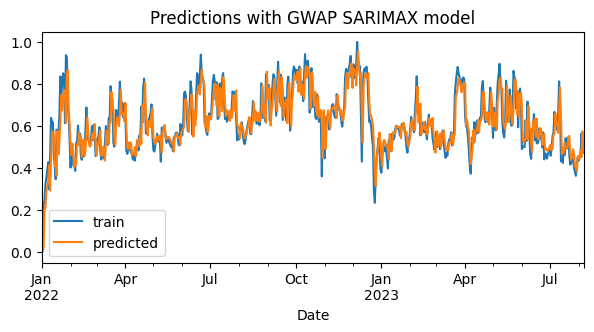

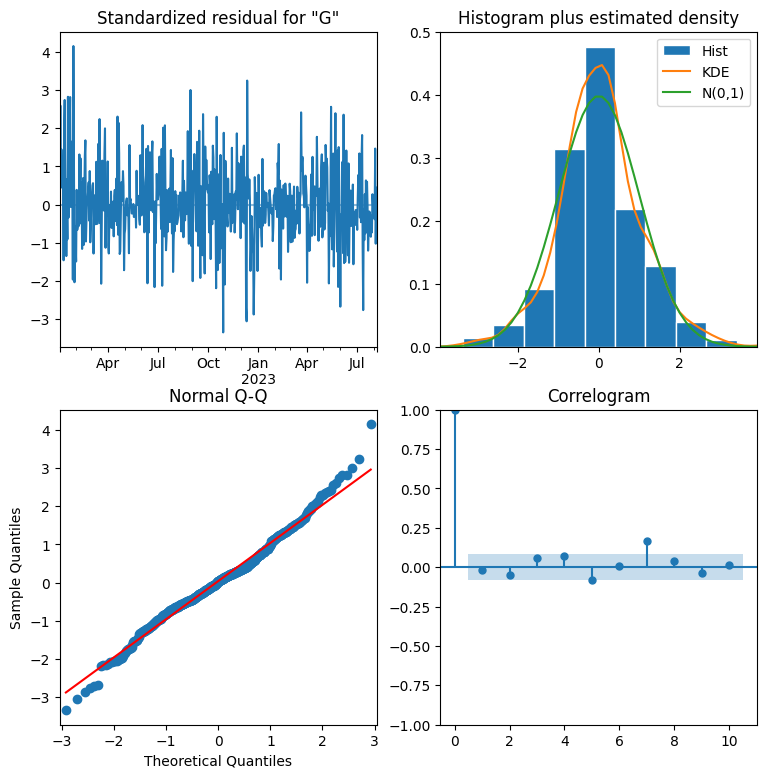

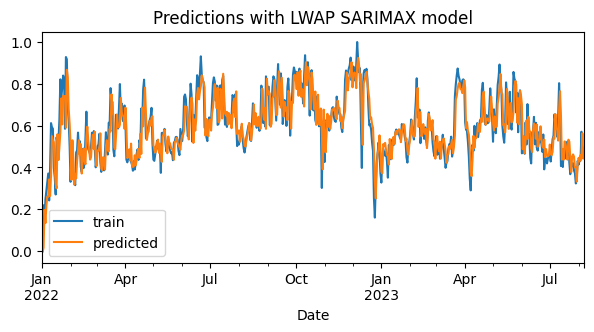

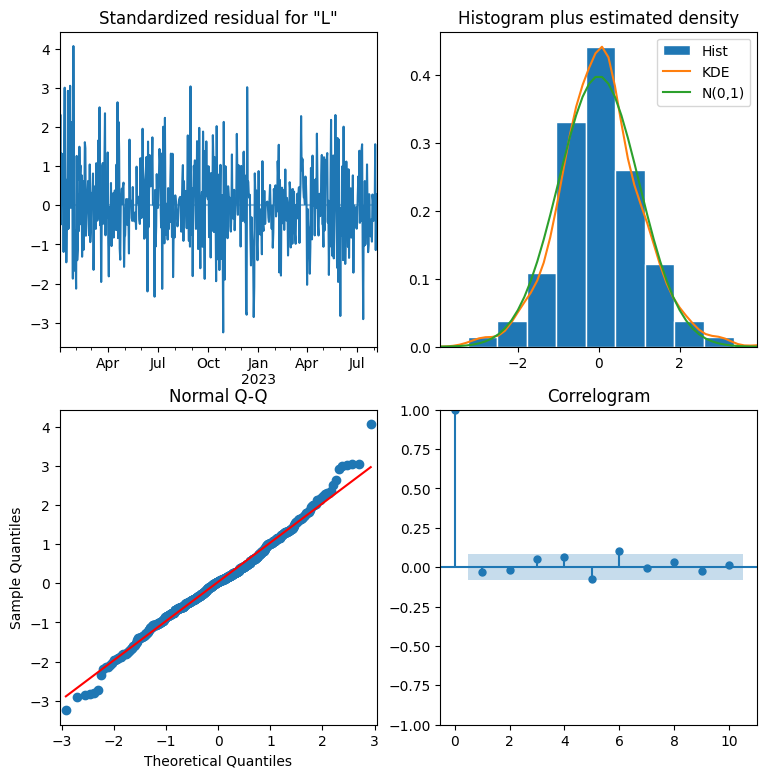

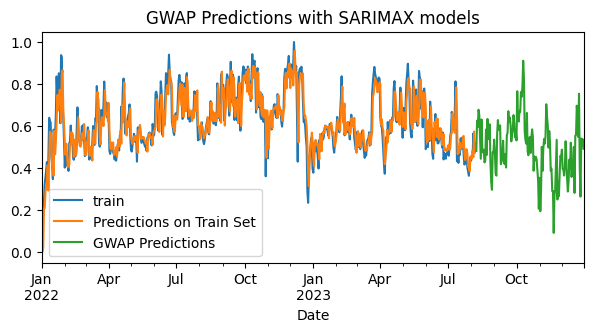

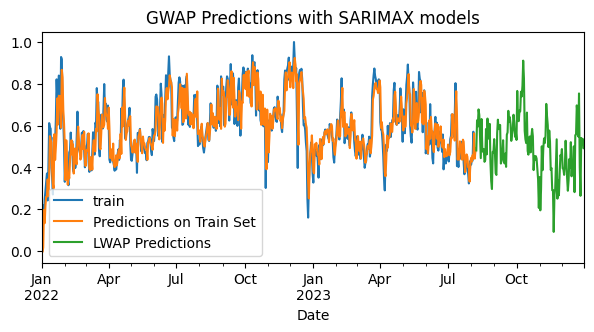

In [14]:
#Optimized orders for GWAP are (1,1,1)(2,0,0,14) and for LWAP are (1,1,1)(2,0,0)(14)
#This function fits the model and plots predictions on the train set; shows the summary of results and residuals diagnostics; and predicts on train set
%run SARIMAX.py

gwap_predictions, lwap_predictions = fit_SARIMAX(GWAP_train, LWAP_train, train_exog=diff_exog_train, gwap_order=(1,1,1), gwap_seasonal_order=(0,0,1,6), lwap_order = (1,1,1), lwap_seasonal_order=(1,0,0,7), GWAP_train = GWAP_train, LWAP_train =LWAP_train, GWAP_test=GWAP_test, LWAP_test=LWAP_test, exog_test = diff_exog_test)


Applying inverse transformations

In [15]:
#Combine gwap and lwap predicions in one data set
all_predictions = pd.concat([gwap_predictions, lwap_predictions], axis=1)

#Apply inverse transformations and convert to dataframe
all_predictions_inverse=boxcoxy_fit_loaded.inverse_transform(all_predictions)
all_predictions_inverse_df = pd.DataFrame(all_predictions_inverse)
all_predictions_inverse_df.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)

#Separate GWAP and LWAP datasets
GWAP_predictions_inverse = pd.DataFrame(all_predictions_inverse[:, 0], columns=['GWAP'])
GWAP_predictions_inverse = pd.concat([test_date,GWAP_predictions_inverse], axis=1)
GWAP_predictions_inverse.set_index('Date', inplace=True)
GWAP_predictions_inverse.index = pd.to_datetime(GWAP_predictions_inverse.index)
GWAP_predictions_inverse.index.freq='D'
GWAP_predictions_inverse = GWAP_predictions_inverse.squeeze()

LWAP_predictions_inverse = pd.DataFrame(all_predictions_inverse[:, 1], columns=['LWAP'])
LWAP_predictions_inverse = pd.concat([test_date,LWAP_predictions_inverse], axis=1)
LWAP_predictions_inverse.set_index('Date', inplace=True)
LWAP_predictions_inverse.index = pd.to_datetime(LWAP_predictions_inverse.index)
LWAP_predictions_inverse.index.freq='D'
LWAP_predictions_inverse = LWAP_predictions_inverse.squeeze()

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



Mean Absolute Error (MAE) on Test Set for GWAP: 1975.8676490089026
Root Mean Squared Error (RMSE) on Test Set for GWAP: 2942.0441772449276
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 30.333600598553673


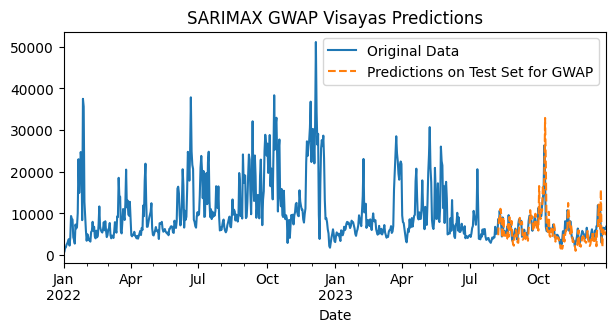

Mean Absolute Error (MAE) on Test Set for LWAP: 1996.7721430713566
Root Mean Squared Error (RMSE) on Test Set for LWAP: 2942.0441772449276
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 28.86339995813546


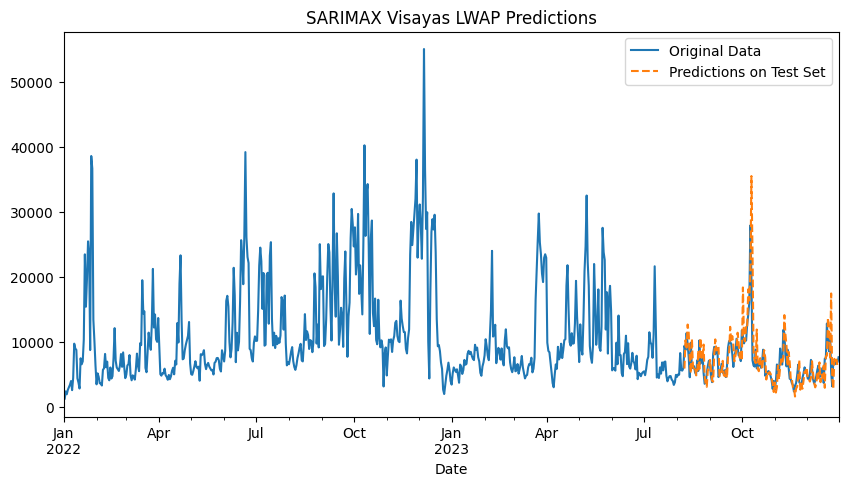

In [20]:
%run SARIMAX.py
evaluate_models(GWAP, LWAP, GWAP_test_inversed, GWAP_predictions_inverse, LWAP_test_inversed, LWAP_predictions_inverse, Region = 'Visayas')


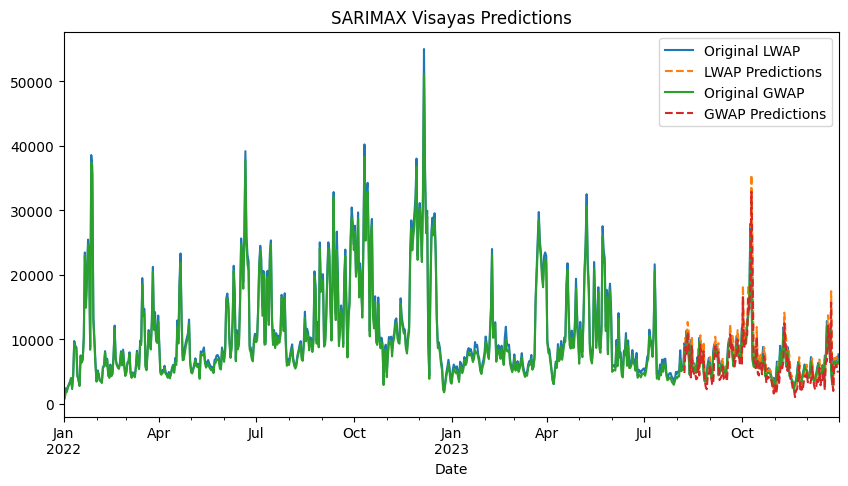

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original LWAP')
LWAP_predictions_inverse.plot(ax=ax, label='LWAP Predictions', linestyle='--')
GWAP.plot(ax=ax, label='Original GWAP')
GWAP_predictions_inverse.plot(ax=ax, label='GWAP Predictions', linestyle='--')
ax.set_title('SARIMAX Visayas Predictions')
ax.legend()
plt.show()

In [18]:
GWAP_predictions_inverse.to_csv('luz-gwap-predictions.csv', index=False)
LWAP_predictions_inverse.to_csv('luz-lwap-predictions.csv', index=False)